<center><h1>Supplemental Material</h1></center>

<br>
<center><h2>Simple and exact nonlinear pendulum motion for all possible initial conditions</h2></center>

Teepanis Chachiyo <teepanisc@nu.ac.th>
Department of Physics, Faculty of Science, Naresuan University, Phitsanulok 65000, Thailand.


### Available at a GitHub repository: [https://github.com/teepanis/nonlinear-pendulum](https://github.com/teepanis/nonlinear-pendulum)




## CKS

These python codes compute angular displacement $\theta(t)$ of the nonlinear pendulum using CKS as described in the paper. The main subroutines are:

1. **theta_CKS**(theta0, omega0, t, ...)
2. **phase_CKS**(theta0, omega0, ...)
3. **K_thiswork**(k)


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def K(k):
    # scipy defines K differently, so that we need to pass k**2 insead of k
    return sp.special.ellipk(k**2)
    
# compute magnitude of omegac
def get_omegac(g, L):
    return 2*np.sqrt(g/L)

# compute magnitude of omegaM
def get_omegaM(theta0, omega0, g, L):
    return np.sqrt(omega0**2 - 2*g/L*np.cos(theta0) + 2*g/L)

# compute magnitude of omega0, basically inverse of above
def get_omega0(theta0, omegaM, g, L):
    return np.sqrt(omegaM**2 + 2*g/L*np.cos(theta0) - 2*g/L)

# compute phase shift for CKS
def phase_CKS(theta0, omega0, g, L, cutoff=1e-8, maxN=200):
    
    # special cases
    if theta0 == 0.0: return 0.0
    if omega0 == 0.0:
        if theta0 > 0: return +np.pi/2
        else: return -np.pi/2

    omegac = get_omegac(g, L)
    omegaM = get_omegaM(theta0, omega0, g, L)
    
    # swinging motion
    if omegaM < omegac:
                
        # compute coefficient an
        k = np.sqrt(L/g)*omegaM/2
        kappa = K(np.sqrt(1-k**2))/K(k)

        a = np.zeros(maxN)
        for j in range(1,maxN,2):
            a[j] = 4/j/np.cosh(kappa*j*np.pi/2)

        def f(delta):
            s = 0
            for j in range(1,maxN,2): s = s + a[j]*np.sin(j*delta)
            return theta0 - s

        def fp(delta):
            s = 0
            for j in range(1,maxN,2): s = s + j*a[j]*np.cos(j*delta)
            return -s

        # initial guess
        delta = np.arcsin(theta0/a[1])

        # update
        while True:
            step = - f(delta)/fp(delta)
            delta = delta + step
            if np.abs(step) < cutoff: break
                
    # stopping motion
    elif omegaM == omegac:
        x = np.sin(theta0/2)
        delta = 1/2*np.log((1+x)/(1-x))
        
    # spining motion
    else:
        
        # compute coefficients
        b = np.zeros(maxN)
        k = np.sqrt(L/g)*omegaM/2
        kappa = K(np.sqrt(1-1/k**2))/K(1/k)
        for n in range(1,maxN):
            b[n] = 2/n/np.cosh(n*np.pi*kappa)

        def f(delta):
            s = 0
            for j in range(1,maxN,1): s = s + b[j]*np.sin(j*delta)
            return theta0 - delta - s

        def fp(delta):
            s = 0
            for j in range(1,maxN,1): s = s + j*b[j]*np.cos(j*delta)
            return -1-s
        
        # initial guess
        delta = theta0/(1+b[1])

        # update
        while True:
            step = - f(delta)/fp(delta)
            delta = delta + step
            if np.abs(step) < cutoff: break

    return delta

##
## the Chiang Khruea solutions (CKS)
##
def theta_CKS(theta0, omega0, t, g, L, maxN=200):
    
    theta = np.zeros(len(t))
    
    omegac = get_omegac(g, L)
    omegaM = get_omegaM(theta0, omega0, g, L)

    # For omega0 < 0, use mirror symmetry
    if omega0 < 0:
        theta0 = -theta0
        omega0 = -omega0
        mirror = True
    else:
        mirror = False
        
    # compute phase constant
    delta = phase_CKS(theta0, omega0, g, L, 1e-8, maxN)
    
    # swinging motion
    if omegaM < omegac:

        # compute period
        k = np.sqrt(L/g)*omegaM/2
        T = 4*np.sqrt(L/g)*K(k)

        # compute coefficients
        a = np.zeros(maxN)
        kappa = K(np.sqrt(1-k**2))/K(k)
        for n in range(1,maxN,2):
            a[n] = 4/n/np.cosh(kappa*n*np.pi/2)
        
        # sum contributions at time t
        for i in range(len(t)):
            s = 0
            for n in range(0,maxN): s = s + a[n]*np.sin(2*n*np.pi/T*t[i] + n*delta)
            theta[i] = s
    
    # stopping motion
    elif omegaM == omegac:
        for i in range(len(t)):
            theta[i] = 2*np.arcsin( np.tanh(np.sqrt(g/L)*t[i] + delta) )
    
    # spinning motion
    else:
        # compute period
        k = np.sqrt(L/g)*omegaM/2
        T = 2*np.sqrt(L/g)/k*K(1/k)
        
        # compute coefficients
        b = np.zeros(maxN)
        kappa = K(np.sqrt(1-1/k**2))/K(1/k)
        for n in range(1,maxN):
            b[n] = 2/n/np.cosh(n*np.pi*kappa)
        
        # sum contributions at time t + 
        for i in range(len(t)):
            s = 0
            for n in range(0,maxN): s = s + b[n]*np.sin(2*n*np.pi/T*t[i] + n*delta)
            theta[i] = 2*np.pi/T*t[i] + delta + s

    if mirror == True: return -theta
    else: return theta


## List of Figures

Below are a list of figures that have been used in the paper. The data was generated by the python code below.

### Figure 1: Results of Angular Displacement using CKS

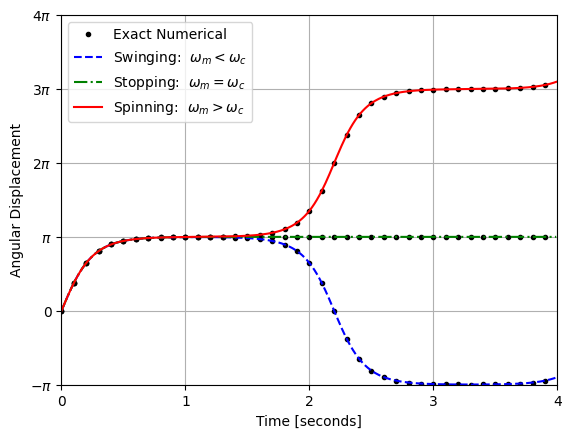

Maximum |Deviation|:  6.17284001691587e-14
Maximum |Deviation|:  0.0
Maximum |Deviation|:  7.105427357601002e-15


In [2]:
g = 9.8
L = g/4/np.pi**2

def theta_exact(omegaM, t):

    E = (1/2*omegaM**2)*L/g
    k = np.sqrt(L/g)*omegaM/2
    theta = np.zeros(len(t))
    
    for i in range(len(t)):
        
        if omegaM < omegac:
            [sn, cn, dn, ph] = sp.special.ellipj(np.sqrt(g/L)*t[i], k**2)
            theta[i] = 2*np.arcsin(k*sn)
        elif omegaM == omegac:
            # using a known property of Jacobi sine function for modulus = 1
            # numerical method is less accurate when modulus = 1, see SciPy document
            sn = np.tanh(np.sqrt(g/L)*t[i])
            theta[i] = 2*np.arcsin(k*sn)
        else:
            [sn, cn, dn, ph] = sp.special.ellipj(np.sqrt(g/L)*t[i]*np.sqrt(E/2), 
                                                 np.sqrt(2/E)**2)
            theta[i] = 2*ph
        
    return theta

omegac = get_omegac(g, L)

Tmax = 4
t = np.arange(0, Tmax, 0.01)

plt.plot(t, theta_exact(omegac-0.0001,t),'k.',markevery=10,label='Exact Numerical')
plt.plot(t, theta_exact(omegac,t),'k.',markevery=10)
plt.plot(t, theta_exact(omegac+0.0001,t),'k.',markevery=10)

plt.plot(t, theta_CKS(0,omegac-0.0001,t,g,L),'b--',label='Swinging:  $\\omega_m < \\omega_c$')
plt.plot(t, theta_CKS(0,omegac,t,g,L),'g-.',label='Stopping:  $\\omega_m = \\omega_c$')
plt.plot(t, theta_CKS(0,omegac+0.0001,t,g,L),'r-', label='Spinning:  $\\omega_m > \\omega_c$')
plt.ylim(-np.pi,4*np.pi)
plt.xlim(0,Tmax)
plt.yticks([-np.pi,0,np.pi,2*np.pi,3*np.pi,4*np.pi],
           ['$-\pi$','0','$\pi$','$2\pi$','$3\pi$','$4\pi$'])
plt.xticks([0,1,2,3,4])
plt.grid()
plt.legend()
plt.xlabel('Time [seconds]')
plt.ylabel('Angular Displacement')
#plt.savefig('fig_3classes.pdf')
plt.show()

print("Maximum |Deviation|: ", 
      max(abs(theta_CKS(0,omegac-0.0001,t,g,L)-
              theta_exact(omegac-0.0001,t))))
print("Maximum |Deviation|: ", 
      max(abs(theta_CKS(0,omegac,t,g,L)-
              theta_exact(omegac,t))))

print("Maximum |Deviation|: ", 
      max(abs(theta_CKS(0,omegac+0.0001,t,g,L)-
              theta_exact(omegac+0.0001,t))))

### Figure 2: Solutions of Phase Shift

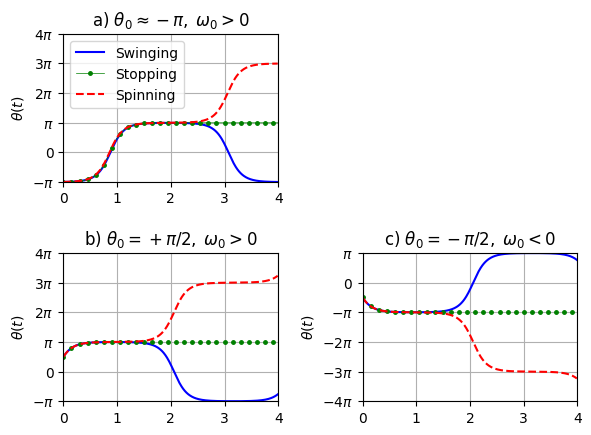

In [3]:
import numpy as np
import matplotlib.pyplot as plt

omegac = get_omegac(g, L)

Tmax = 4
t = np.arange(0,Tmax,0.01)

# a) theta0 near -pi, omega0 > 0
theta0 = -179/180*np.pi
omega0_swinging = get_omega0(theta0, omegac-0.0001, g, L)
omega0_stopping = get_omega0(theta0, omegac       , g, L)
omega0_spinning = get_omega0(theta0, omegac+0.0001, g, L)
theta_swinging_a = theta_CKS(theta0, omega0_swinging, t, g, L)
theta_stopping_a = theta_CKS(theta0, omega0_stopping, t, g, L)
theta_spinning_a = theta_CKS(theta0, omega0_spinning, t, g, L)

# b) theta0 = pi/2, omega0 > 0
theta0 = np.pi/2
omega0_swinging = get_omega0(theta0, omegac-0.0001, g, L)
omega0_stopping = get_omega0(theta0, omegac      , g, L)
omega0_spinning = get_omega0(theta0, omegac+0.0001, g, L)
theta_swinging_b = theta_CKS(theta0, omega0_swinging, t, g, L)
theta_stopping_b = theta_CKS(theta0, omega0_stopping, t, g, L)
theta_spinning_b = theta_CKS(theta0, omega0_spinning, t, g, L)

# c) theta0 = -pi/2, omega0 < 0
theta0 = -np.pi/2
theta_swinging_c = theta_CKS(theta0, -omega0_swinging, t, g, L)
theta_stopping_c = theta_CKS(theta0, -omega0_stopping, t, g, L)
theta_spinning_c = theta_CKS(theta0, -omega0_spinning, t, g, L)

fig, ax = plt.subplots(2,2)
fig.tight_layout(pad=3)

ax[0,0].set_title('a) $\\theta_0 \\approx -\pi,\\; \\omega_0 > 0$')
ax[0,0].plot(t, theta_swinging_a,'b-',label='Swinging')
ax[0,0].plot(t, theta_stopping_a,'g.-', linewidth=0.5, 
             markersize=5, markevery=15, label='Stopping')
ax[0,0].plot(t, theta_spinning_a,'r--', label='Spinning')

ax[1,0].set_title('b) $\\theta_0 =+\pi/2,\\; \\omega_0 > 0$')
ax[1,0].plot(t, theta_swinging_b,'b-')
ax[1,0].plot(t, theta_stopping_b,'g.', markersize=5, markevery=15)
ax[1,0].plot(t, theta_spinning_b,'r--')

ax[1,1].set_title('c) $\\theta_0 =-\pi/2,\\; \\omega_0 < 0$')
ax[1,1].plot(t, theta_swinging_c,'b-')
ax[1,1].plot(t, theta_stopping_c, 'g.',markersize=5, markevery=15)
ax[1,1].plot(t, theta_spinning_c,'r--')

for i in range(0,2):
    for j in range(0,2):

        ax[i,j].set_ylim(-np.pi,4*np.pi)
        ax[i,j].set_xlim(0,Tmax)
        ax[i,j].set_yticks([-np.pi,0,np.pi,2*np.pi,3*np.pi,4*np.pi],
                   ['$-\pi$','0','$\pi$','$2\pi$','$3\pi$','$4\pi$'])
        ax[i,j].set_xticks([0,1,2,3,4])
        ax[i,j].grid()
        #ax[i,j].legend()
        #ax[i,j].set_xlabel('Time [seconds]')
        ax[i,j].set_ylabel('$\\theta(t)$')

ax[0,0].legend()
ax[1,1].set_ylim(-4*np.pi,np.pi)
ax[1,1].set_yticks([-4*np.pi,-3*np.pi,-2*np.pi,-np.pi,0,np.pi],
                   ['$-4\pi$','$-3\pi$','$-2\pi$','$-\pi$','$0$','$\pi$'])

#ax[1,1].plot([0,4],[0,0],'k-')
#ax[1,0].plot([0,4],[0,0],'k-')

ax[0,1].set_axis_off()

#plt.savefig('fig_phase_shift.svg',transparent=True)
plt.show()

### Figure 3: Frequencies Analysis

A swinging and spinning pendulum with $\theta_0 = 0$ and $\omega_0 = \omega_c \pm 0.0001$, basically the same condition as in Fig 1., is simulated.

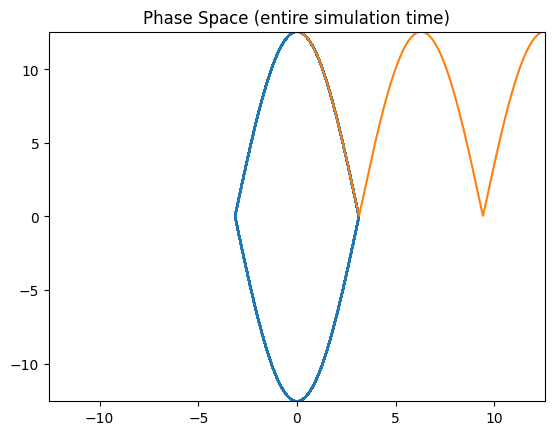

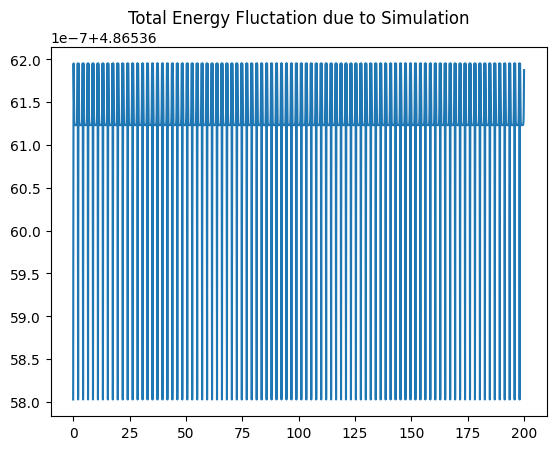

In [4]:
m = 1.0
g = 9.8
L = g/4/np.pi**2

# Linear angular frequency of a pendulum
OmegaL = np.sqrt(g/L)

def simulate(theta0, omega0, Tmax=2000, dt=0.001):
    
    t = np.arange(0,Tmax,dt)
    maxN = len(t)
    theta = np.zeros(maxN)
    omega = np.zeros(maxN)

    # initial condition
    theta[0] = theta0
    omega[0] = omega0

    # define acceleraton
    def a(theta,omega,t):
        return -g/L*np.sin(theta)
        
    
    for i in range(1, maxN):

        # Euler-Cromer
        #omega[i] = omega[i-1] + a(theta[i-1],omega[i-1],t[i-1])*dt
        #theta[i] = theta[i-1] + omega[i]*dt

        # Velocity Verlet
        theta[i] = theta[i-1] + omega[i-1]*dt + 1/2*a(theta[i-1],omega[i-1],t[i-1])*dt**2
        omega[i] = omega[i-1] + (a(theta[i-1],omega[i-1],t[i-1])+a(theta[i],omega[i],t[i]))/2*dt

    return t, theta, omega

Tmax = 200

##
## Collect data for swinging and spinning motion
## 
omegaM = get_omegac(g,L)-0.0001
t, theta_swinging, omega_swinging = simulate(0, omegaM, Tmax, dt=0.0001)
omegaM = get_omegac(g,L)+0.0001
t, theta_spinning, omega_spinning = simulate(0, omegaM, Tmax, dt=0.0001)

N = len(t)
#plt.plot(t[0:N//10], theta_swinging[0:N//10])
#plt.plot(t[0:N//10], theta_spinning[0:N//10])
#plt.title('$\\theta(t)$ (first 10% of max time)')
#plt.show()
#plt.plot(t[0:N//10], omega_swinging[0:N//10])
#plt.plot(t[0:N//10], omega_spinning[0:N//10])
#plt.title('$\\omega(t)$ (first 10% of max time)')
#plt.show()
plt.plot(theta_swinging,omega_swinging)
plt.plot(theta_spinning,omega_spinning)
plt.title('Phase Space (entire simulation time)')
plt.xlim(-4*np.pi,+4*np.pi)
plt.ylim(-4*np.pi,+4*np.pi)
plt.show()

##
## Check total energy flucation
##
I = m*L**2
Ec = 1/2*I*omegac**2
E_swinging  = 1/2*I*omega_swinging**2 - m*g*L*np.cos(theta_swinging) + m*g*L

plt.plot(t, E_swinging)
plt.title('Total Energy Fluctation due to Simulation')
plt.show()

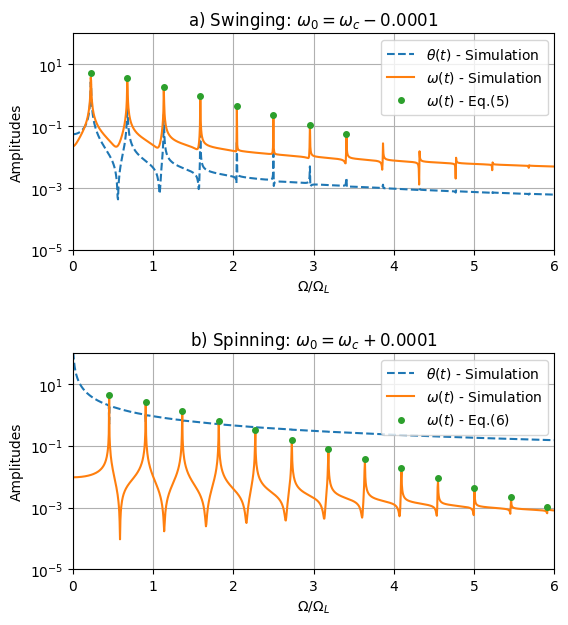

In [5]:
## Fourier transform
THETA_swinging = sp.fft.fft(theta_swinging)
OMEGA_swinging = sp.fft.fft(omega_swinging)

THETA_spinning = sp.fft.fft(theta_spinning)
OMEGA_spinning = sp.fft.fft(omega_spinning)

Omega = 2*np.pi*N/Tmax*sp.fft.fftfreq(N)[:N//2]

fig, ax = plt.subplots(2)
fig.tight_layout(pad=3)
fig.set_size_inches(6, 7)

ax[0].set_title('a) Swinging: $\\omega_0 = \\omega_c-0.0001$')
ax[0].plot(Omega/OmegaL, 2/N*np.abs(THETA_swinging[0:N//2]),'--' ,label='$\\theta(t)$ - Simulation')
ax[0].plot(Omega/OmegaL, 2/N*np.abs(OMEGA_swinging[0:N//2]),'-', label='$\\omega(t)$ - Simulation')

ax[1].set_title('b) Spinning: $\\omega_0 = \\omega_c+0.0001$')
ax[1].plot(Omega/OmegaL, 2/N*np.abs(THETA_spinning[0:N//2]),'--' ,label='$\\theta(t)$ - Simulation')
ax[1].plot(Omega/OmegaL, 2/N*np.abs(OMEGA_spinning[0:N//2]),'-', label='$\\omega(t)$ - Simulation')

## theoretical omega coefficients
def theoretical_freq_domain(omegaM):
    
    omegac = get_omegac(g, L)
    maxN = 17
    if omegaM < omegac:
        k = np.sqrt(L/g)*omegaM/2
        kappa = K(np.sqrt(1-k**2))/K(k)
        T = 4*np.sqrt(L/g)*K(k)
        a = np.zeros(maxN)
        W = np.zeros(maxN)
        for n in range(1,maxN,2):
            a[n] = 4/n/np.cosh(kappa*n*np.pi/2)
            W[n] = a[n]*2*n*np.pi/T        
    elif omegaM > omegac:
        b = np.zeros(maxN)
        W = np.zeros(maxN)
        k = np.sqrt(L/g)*omegaM/2
        kappa = K(np.sqrt(1-1/k**2))/K(1/k)
        T = 2*np.sqrt(L/g)/k*K(1/k)
        for n in range(1,maxN):
            b[n] = 2/n/np.cosh(n*np.pi*kappa)
            W[n] = b[n]*2*n*np.pi/T
            
    Omega0 = 2*np.pi/T
    Omega_Theory = np.zeros(maxN)
    for i in range(0,maxN): Omega_Theory[i] = i*Omega0

    return Omega_Theory, W

omegaM = get_omegac(g,L)-0.0001
Omega_Theory, W = theoretical_freq_domain(omegaM)
ax[0].plot(Omega_Theory/OmegaL, W, '.', markersize=8, label='$\\omega(t)$ - Eq.(5)')

omegaM = get_omegac(g,L)+0.0001
Omega_Theory, W = theoretical_freq_domain(omegaM)
ax[1].plot(Omega_Theory/OmegaL, W, '.', markersize=8, label='$\\omega(t)$ - Eq.(6)')

for i in range(0,2):    
    ax[i].set_xlabel('$\\Omega/\\Omega_L$')
    ax[i].set_ylabel('Amplitudes')
    ax[i].set_xlim(0,6)
    ax[i].set_ylim(1e-5,1e2)
    ax[i].grid()
    ax[i].set_yscale('log')
    ax[i].legend()

#plt.savefig('fig_frequencies.pdf')
plt.show()


## Derivation the CKS in Eq. (2)

The equation of motion for a physical pendulum reads

$$\frac{d^2 \theta}{dt^2} + \frac{LMg}{I}\sin \theta = 0\tag{S5}$$

$L$ is the distance from a pivot point to the center of mass. $I$ is the moment of inertia about the pivot point. For a simple pendulum, $I = ML^2$; so the equation of motion reduces to

$$\frac{d^2 \theta}{dt^2} + \frac{g}{L}\sin \theta = 0 \tag{S6}$$

The above form is still inconvenient to work with due to the factor $\frac{g}{L}$ that would have to tag along throughout the derivations. We define a scaled time, 

$$\tau \equiv \sqrt{\frac{g}{L}}t \label{eq_deftime}\tag{S7}$$

so that the equation of motion reduces further to


$$\frac{d^2 \theta}{d\tau^2} + \sin \theta = 0 \label{eq_motion}\tag{S8}$$

Once the solution $\theta(\tau)$ is found, it can be converted back to a function the physical time $\theta(\sqrt{\frac{g}{L}}t)$. If the pendulum is at rest initially with an amplitude $\theta_0$, the solution of Eq. (\ref{eq_motion}) is typically written in the litterature as


$$\theta(\tau) = 2 \arcsin \left[ k \, \text{sn}(\tau+K, k)\right] \label{DLMF_sn_sol}\tag{S9}$$

see [DLMF, 22.19.E2](https://dlmf.nist.gov/22.19.E2). Here, $k = \sin \frac{\theta_0}{2}$. $\text{sn}(z,k)$ is one of the Jacobi elliptic functions; and $K$ is the complete elliptical integral of the first kind, which in this context is a quarter of the period of the pendulum. However, the time dependent can be shifted from the quarter period $K$ back to zero by using the relation

$$\text{sn}(z+K,k) = \text{cd}(z,k)\label{DLMF_sn_cd}\tag{S10}$$

see [DLMF, 22.4.T3](https://dlmf.nist.gov/22.4#T3). $\text{cd}(z,k)$ is another Jacobi elliptic function. Therefore, the solution takes the form

$$\theta(\tau) = 2 \arcsin \left[ k \, \text{cd}(\tau, k)\right] \tag{S11}$$

To avoid the $\arcsin[\cdots]$ dependent above and steering toward a simpler Fourier form, the following integral property is used.

$$\int \text{sd}(x,k) \, dx = -\frac{1}{k k'}\arcsin[  k \, \text{cd}(x, k)] \label{DLMF_int_sd}\tag{S12}  $$

see [DLMF, 22.14.E5](https://dlmf.nist.gov/22.14.E5). Note that the minus sign is taken out of $\arcsin[\cdots]$ function, as compared to the reference. $\text{sd}(z,k)$ is one of the Jacobi elliptic function. Therefore, the solution can now be written as

$$\theta(\tau) = - 2 k k' \int \text{sd}(\tau,k) \, d\tau \label{eq_7}\tag{S13}$$

A fourier expansion of $\text{sd}(z, k)$ is also available. It reads

$$\text{sd}(z,k) = \frac{2\pi}{K k k'}\sum_{n=0}^{\infty} \frac{(-1)^n q^{n+\frac{1}{2}}\sin ((2n+1)\zeta)}{1+q^{2n+1}}  \label{DLMF_sd_fourier}\tag{S14}$$

see [DLMF, 22.11.E5](https://dlmf.nist.gov/22.11.E5). The auxillary variables defined in the reference are: $k' = \sqrt{1-k^2}, q = e^{-\pi K(k')/K(k)}, \zeta = \frac{\pi z}{2K(k)}$. Before going any further, it is convenient to adjust the form of the summation index $n$. Note that $(2n+1)$ is always an odd integer, so we define an odd integer $m = (2n+1)$. The above Fourier expansion becomes

$$\text{sd}(\tau,k) = \frac{2\pi}{K k k'}\sum_{m\,\text{odd}} \frac{(-1)^{\frac{m-1}{2}} q^{\frac{m}{2}}\sin (\frac{m\pi}{2K}\tau)}{1+q^m} = \frac{2\pi}{K k k'}\sum_{m\,\text{odd}} \frac{(-1)^{\frac{m-1}{2}} \sin (\frac{m\pi}{2K}\tau)}{2\cosh(\kappa m \pi/2)}  \tag{S15}$$

Here, we define $\kappa \equiv \frac{K(\sqrt{1-k^2})}{K(k)}$. Substutute $\text{sd}(\tau,k)$ above into the integral in Eq. (\ref{eq_7}). The solution becomes


$$\theta(\tau) = -  \frac{2 \pi}{K} \sum_{m\,\text{odd}} \frac{(-1)^{\frac{m-1}{2}} }{\cosh(\kappa m \pi/2)}  \int \sin (\frac{m\pi}{2K}\tau) \, d\tau \tag{S16}$$

Here, the integration is pushed through the summation to meet the time dependent $\sin(\frac{m\pi}{2K}\tau)$. The integration can easily be performed, yielding

$$\theta(\tau) =  \sum_{m\,\text{odd}}   \frac{(-1)^{\frac{m-1}{2}}}{m}  \frac{4}{\cosh(\kappa m \pi /2)}   \cos (\frac{m\pi}{2K}\tau)  \tag{S17}$$

However, $4K$ can be interpreted as the period in the scaled time $\tau$. Therefore, 

$$\cos(\frac{m\pi}{2K}\tau) = \cos(\frac{2 m\pi}{4 K}\tau)\tag{S18}$$

Notice the ratio of the scaled time $\tau$ to its period $4K$. Upon converting from the scaled time to the physical time $\tau \rightarrow \sqrt{\frac{g}{L}} t$, so is the period $4K \rightarrow \sqrt{\frac{g}{L}}T$. Hence, the factor $\sqrt{\frac{g}{L}}$ is eliminated inside the cosine fuctions. Renaming the index $m \rightarrow n$, the series becomes.

$$\theta(t) =  \sum_{n\,\text{odd}} a_n   \cos (\frac{2 n \pi}{T} t) \label{cosine_series}  \tag{S19}$$

where the Fourier coefficients (only for n odd) are

$$a_n =   \frac{(-1)^{\frac{n-1}{2}}}{n}  \frac{4}{\cosh(\kappa n \pi /2)},\quad \kappa \equiv \frac{K(\sqrt{1-k^2})}{K(k)} \tag{S20}$$

But the series in Eq.(\ref{cosine_series}) when the pendulum starts at rest at the initial angle $\theta_0$. Shifting the by a quarter of the period causes the pendulum to start at the bottom, with initial angular speed $\omega_m$ to jump start the motion.

$$\theta(t) =  \sum_{n\,\text{odd}} a_n   \cos (\frac{2 n \pi}{T} t - \frac{n\pi}{2})   \tag{S21}$$

Use a simple trigonometry identity $\cos(A-B) = \cos A \cos B + \sin A \sin B$ and the fact that $n$ is always an odd number, we have

$$\theta(t) =  \sum_{n\,\text{odd}} a_n (-1)^{\frac{n-1}{2}}   \sin (\frac{2 n \pi}{T} t )   \tag{S22}$$

The alternating $\pm1$ sign can be absorbed into $a_n$, leading to an even simpler form

$$\theta(t) =  \sum_{n\,\text{odd}} a_n    \sin (\frac{2 n \pi}{T} t  + n\delta)   \tag{S23}$$

$$a_n =     \frac{4}{n\, \cosh(\kappa n \pi /2)},\quad \kappa \equiv \frac{K(\sqrt{1-k^2})}{K(k)} \tag{S24}$$


## the Phase Constant

The phase constant $\delta$ for the swinging motion can be computed by finding a root of 

$$f(\delta) = 0 = \theta_0 - \sum_{n\,\text{odd}} a_n   \sin ( n\delta)\tag{S25} $$

For Newton root finding method, an initial guess of $\delta_0$ need to be given. The successive values of $\delta_n$ can be updated using

$$ \delta_{n+1} = \delta_n - \frac{f(\delta_n)}{f'(\delta_n)} \label{Newton_update}\tag{S26}$$

The iterations stop when the $\delta_n$ converges. The initial guess $\delta_0$ can be determined from using only the first term in the summation, namely.

$$ 0 = \theta_0 - a_1 \sin(\delta_0) \tag{S27}$$

Therefore,

$$\delta_0  =  \arcsin(\theta_0/a_1) \tag{S28}$$

In the python codes above, in the subroutine **phase_CKS(...)**, the iterations in Eq. (\ref{Newton_update}) continue until $\delta_{n+1}$ differs from $\delta_n$ smaller than $10^{-8}$. The converged value of $\delta$ is then used to evaluate $\theta(t)$ using CKS. 

## References

Ganley, W. P. (1985). Simple pendulum approximation. American Journal of Physics, 53(1), 73–76. https://doi.org/10.1119/1.13970

Lima, F. M. S. (2008). Simple ‘log formulae’ for pendulum motion valid for any amplitude. European Journal of Physics, 29(5), 1091–1098. https://doi.org/10.1088/0143-0807/29/5/021

[DLMF]  NIST Digital Library of Mathematical Functions. https://dlmf.nist.gov/, Release 1.2.4 of 2025-03-15. F. W. J. Olver, A. B. Olde Daalhuis, D. W. Lozier, B. I. Schneider, R. F. Boisvert, C. W. Clark, B. R. Miller, B. V. Saunders, H. S. Cohl, and M. A. McClain, eds.